## Статистичний аналіз даних

0.Зчитано дані з `data.csv` у форматі np.ndarray в змінну data.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from matplotlib import pyplot as plt
from scipy import stats as st
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest 

data = np.array(pd.read_csv('data.csv')).flatten()
#ще можна зчитати файл pd.read_csv('data.csv').data.values

## Перевірка вибірки на нормальність

1.**Візуалізація розподілу** 

Подивимось спершу на розподіл наших даних. Для цього побудуємо гістограму даних, а на неї накладемо лінійний графік щільності (PDF) нормального розподілу з середнім та стандартним відхиленням як у наших даних.

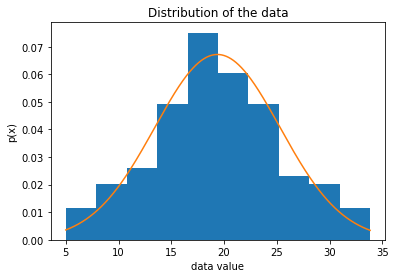

In [20]:
x_axis = np.arange(data.min(), data.max(), 0.01)

plt.hist(data, density = True)
plt.plot(x_axis, norm.pdf(x_axis, np.mean(data), np.std(data)))

plt.xlabel('data value')
plt.ylabel('p(x)')
plt.title('Distribution of the data');

In [21]:
np.mean(data), np.median(data)

(19.37322276512519, 19.0930578714127)

>ВИСНОВОК:дані розподілені нормально, лінійний графік щільності має форму схожу на дзвіночок, а середнє та медіана мають майже однакові значення.

2.**QQ графік**

Ще одним візуалізаційним методом перевірки розподілу вибірки даних на нормальність є графік квантиль-квантиль, Q-Q графік або QQ графік.

Цей графік генерує власну вибірку (sample) ідеалізованого розподілу, з яким ми порівнюємо наші дані, у цьому випадку розподіл Гауса. Дані ідеалізованої вибірки поділяються на групи (наприклад, 5), які називаються квантилями. Кожна точка наших даних поєднується з подібним членом з ідеалізованого розподілу.

Отримані точки будуються як діаграма розсіювання з ідеалізованим значенням на осі абсцис (х) і вибіркою даних на осі ординат (у).

Якщо наша вибірка даних ідеально збігається з ідеалізованою, то це буде виглядати на графіку як лінія точок під кутом 45 градусів від нижнього лівого кута графіка до верхнього правого. Часто на графіку малюють додаткову лінію, щоб допомогти зрозуміти це очікування. Відхилення крапок від лінії очікувань (ідеального варіанту) показує відхилення наших даних від очікуваного розподілу.

Ми можемо розробити діаграму QQ в Python за допомогою функції [statsmodels qqplot()](https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html). Функція бере вибірку даних і за замовчуванням припускає, що ми порівнюємо її з розподілом Гауса. Ми можемо намалювати стандартизовану лінію, встановивши для аргументу `line` значення `s`.


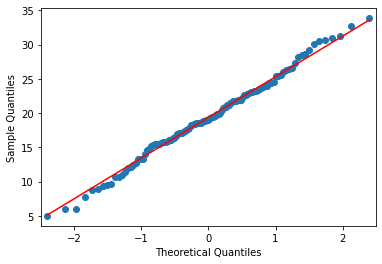

In [47]:
sm.qqplot(data, line='s');

>ВИСНОВОК:Лінійність розміщення більшості точок дозволяє припустити, що дані розподілені нормально.

3.**Тест Шапіро-Вілка**

Тест Шапіро-Вілка визначає для вибірки, наскільки ймовірно, що вона була витягнута з нормального розподілу.
Нульова гіпотеза H0 тесту Шапіро-Вилка полягає в тому, що випадкова величина, вибірка якої відома, розподілена за нормальним законом. Альтернативна гіпотеза H1 полягає в тому, що закон розподілу **не** є нормальним.

Протестувати вибірку на нормальність можна з допомогою тета Шапіро-Вілка, реалізованого в функцію [scipy.stats.shapiro](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html).


In [34]:
st.shapiro(data)

ShapiroResult(statistic=0.992682933807373, pvalue=0.7840698957443237)

In [40]:
if st.shapiro(data)[1] <= 0.05:
     print('Нульову гіпотезу відхилено')   
else:
     print('Нульова гіпотеза не може бути відхилена')   

Нульова гіпотеза не може бути відхилена


## Z-test

4.Уявіть, що наші дані - це сума покупок в доларах наших покупців на сайті протягом липня 2022 року.
До цього місяця, ми мали продажі в середньому на чек $20. Чи вийшло у нас статистично значущо **підвищити** середній чек за останній місяць? Виведіть p-значення статистичного тесту та зробіть висновок, чи ми маємо зараз статистично значущу різницю у розмірі середнього чеку.
(одновибірочний z-test)

In [41]:
ztest_Score, p_value = ztest(data, value = 20, alternative='larger')
ztest_Score, p_value

(-1.151770006393348, 0.8752922019567716)

In [48]:
if(p_value <=  0.05):
    print("У нас вийшло статистично значущо підвищити середній чек за останній місяць")
else:
    print("Статистично значущих змін не відбулося")

Статистично значущих змін не відбулося


In [43]:
np.mean(data)

19.37322276512519

5.Пройшов час, і ми зібрали дані про продажі за серпень 2022 року (файл data_2). Чи змінився стат. значущо середній чек порівняно з липнем 2022? (двовибірковий ztest з Н0 - що середні значення в липні та серпні 2022 року - однакові).

In [44]:
data_2 = np.array(pd.read_csv('data_2.csv')).flatten()
ztest(data, data_2, value=0)

(-42.87672310138548, 0.0)

In [45]:
display(np.mean(data), np.mean(data_2))

19.37322276512519

50.30291426037849

>ВИСНОВОК:Нульова гіпотеза відхиляється, адже p_value=0. З огляду на середні значення цілком зрозуміло, що середні значення в липні та серпні значно відрізняються - у серпні приблизно в 2.5 рази більше.

## Аналіз A/B тесту

Маємо проаналізувати дані A/B тесту в популярній [грі Cookie Cats](https://www.facebook.com/cookiecatsgame). Це класична гра-головоломка в стилі «з’єднай три», де гравець повинен з’єднати плитки одного кольору, щоб очистити дошку та виграти рівень. На дошці також зображені співаючі котики :)

Під час проходження гри гравці стикаються з воротами, які змушують їх чекати деякий час, перш ніж вони зможуть прогресувати або зробити покупку в додатку. У цьому блоці завдань ми проаналізуємо результати A/B тесту, коли перші ворота в Cookie Cats було переміщено з рівня 30 на рівень 40. Зокрема, ми проаналізуємо вплив на утримання (retention) гравців. Тобто хочемо зрозуміти чи переміщення воріт на 10 рівнів пізніше якимось чином вплинуло на те, що користувачі перестають грати в гру раніше чи пізніше з точки зору кількості їх днів з моменту встановлення гри.

Будемо працювати з даними з файлу `cookie_cats.csv`. Змінні в даних наступні:

- userid - унікальний номер, який ідентифікує кожного гравця.
- version - чи потрапив гравець в контрольну групу (gate_30 - ворота на 30 рівні) чи тестову групу (gate_40 - ворота на 40 рівні).
- sum_gamerounds - кількість ігрових раундів, зіграних гравцем протягом першого тижня після встановлення
- retention_1 - чи через 1 день після встановлення гравець повернувся і почав грати?
- retention_7 - чи через 7 днів після встановлення гравець повернувся і почав грати?

Коли гравець встановлював гру, його випадковим чином призначали до групи gate_30 або gate_40.

6.Зчитано дані АВ тесту у змінну `df` та виведіть середнє значення показника показник `retention_7` (утримання на 7 день) по версіям гри. Сформулюйте гіпотезу: яка версія дає краще утримання через 7 днів після встановлення гри?

In [6]:
df = pd.read_csv('cookie_cats.csv')
df.groupby('version')['retention_7'].mean()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

>Гіпотеза: версія гри, де перші ворота в Cookie Cats знаходяться на рівні 30 має більш краще утримання через 7 днів.

7.Перевірка з допомогою z-тесту чи дає якась з версій гри кращий показник `retention_7` на рівні значущості 0.05. 

In [2]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [18]:
gate_30_results = df[df['version'] == 'gate_30']['retention_7']
gate_40_results = df[df['version'] == 'gate_40']['retention_7']


n_30 = gate_30_results.count()
n_40 = gate_40_results.count()
successes = [gate_30_results.sum(), gate_40_results.sum()]
nobs = [n_30, n_40]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_30, lower_40), (upper_30, upper_40) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'Довірчий інтервал 95% для версії gate_30: [{lower_30:.3f}, {upper_30:.3f}]')
print(f'Довірчий інтервал 95% для версії gate_40: [{lower_40:.3f}, {upper_40:.3f}]')

z statistic: 3.16
p-value: 0.002
Довірчий інтервал 95% для версії gate_30: [0.187, 0.194]
Довірчий інтервал 95% для версії gate_40: [0.178, 0.186]


>ВИСНОВКИ:
1. Так як, p-value менше за 0.05, то нульова гіпотеза відхиляється, тобто різниця між поведінкою користувачів у різних версіях гри є статистична значущою.
2. Довірчі інтервали утримання користувачів з різних версій гри не перетинаються, це також підтверджує, що різниця між версіями статистично значуща.
Отже, краще повернути версію гри, де ворота в Cookie Cats було на 30 рівні.

8.Є ще один тип тестів, який використовується для бінарної метрики як от "зробить юзер дію, чи ні" - тест **Хі-квадрат**. В нього інші гіпотези Н0 і Н1 на відміну від z- та t-тестів. А також цей тест можна використовувати, якщо в нас більше за 2 досліджувані групи, тобто в нас не А/В тест, а А/B/C/D, наприклад.  

В **z- та t-тестах** (які відрізняються тим, що ми в першому не знаємо дисперсію генеральної сукупності, але якщо в нас великий набір даних, то ці два тести дають дуже схожі результати) **ми перевіряємо, чи є різниця у середніх показниках по групам користувачів**.  

А в **тесті Хі-квадрат ми перевіряємо чи є звʼязок між групою користувача і тим, чи він зробить цікаву нам дію**. Це ніби дослідження одного і того самого, але дещо різними способами. Для перевірки, можна виконувати кілька тестів (особливо, якщо один дає якийсь непереконливий результат типу р-значення 0.07 - наче і fail to regect H0 на рівні стат значущості 5%, але цікаво, що скажуть інші тести), тож, зробимо і ми тест хі-квадрат та порівняємо його результат з z-тестом.

Про різницю між тестами можна почитати ще [тут](https://stats.stackexchange.com/a/178860) - це просто пояснення користувача стековерфлоу, але там розумні люди сидять.

Для проведення хі-квадрат тесту скористаємось функцією з `scipy.stats` `chi2_contingency` для обчислення статистики хі-квадрат і р-значення для перевірки конкретної гіпотези. 
Тут гіпотези наступні
- Н0: значення retention_7 не залежить від версії гри
- Н1: є залежність між версією гри і значенням retention_7



In [10]:
#pd.crosstab(df['version'],df['retention_7'])
obs3 = df.pivot_table(index='version', columns = 'retention_7', aggfunc = 'size')
obs3

retention_7,False,True
version,,
gate_30,36198,8502
gate_40,37210,8279


In [11]:
st.chi2_contingency(obs3)

(9.959086799559167,
 0.0016005742679058301,
 1,
 array([[36382.90257127,  8317.09742873],
        [37025.09742873,  8463.90257127]]))

>ВИСНОВОК: p-value = 0.002 < alpha = 0.05, отже, нульова гіпотеза відхиляється і можна припустити, що значення retention_7 залежить від версії гри.